<a href="https://colab.research.google.com/github/HoanDiep/BT8_tuan9/blob/main/Housing_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from keras.models import Sequential
from keras.layers import Dense

data = pd.read_csv("Housing.csv")
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
data.shape


(545, 13)

In [13]:
X=data.drop(data.columns[[0]],axis=1)
Y=data['price']

categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
ct = ColumnTransformer([('encoder', OneHotEncoder(), categorical_cols)], remainder='passthrough')
X = np.array(ct.fit_transform(X))

X


array([[0., 1., 1., ..., 2., 3., 2.],
       [0., 1., 1., ..., 4., 4., 3.],
       [0., 1., 1., ..., 2., 2., 2.],
       ...,
       [0., 1., 1., ..., 1., 1., 0.],
       [1., 0., 1., ..., 1., 1., 0.],
       [0., 1., 1., ..., 1., 2., 0.]])

In [15]:
sc = StandardScaler()
X[:, len(categorical_cols):] = sc.fit_transform(X[:, len(categorical_cols):])


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [16]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

In [18]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2688      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,009
Trainable params: 11,009
Non-trainable params: 0
_________________________________________________________________


In [19]:
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=32)

Epoch 1/100
11/11 [==============================] - 2s 43ms/step - loss: 26817285062656.0000 - mae: 4787143.5000 - val_loss: 25096515223552.0000 - val_mae: 4740033.0000
Epoch 2/100
11/11 [==============================] - 0s 10ms/step - loss: 26817270382592.0000 - mae: 4787142.0000 - val_loss: 25096498446336.0000 - val_mae: 4740031.0000
Epoch 3/100
11/11 [==============================] - 0s 9ms/step - loss: 26817241022464.0000 - mae: 4787139.0000 - val_loss: 25096458600448.0000 - val_mae: 4740027.0000
Epoch 4/100
11/11 [==============================] - 0s 11ms/step - loss: 26817192787968.0000 - mae: 4787133.5000 - val_loss: 25096387297280.0000 - val_mae: 4740019.5000
Epoch 5/100
11/11 [==============================] - 0s 10ms/step - loss: 26817096318976.0000 - mae: 4787124.0000 - val_loss: 25096261468160.0000 - val_mae: 4740006.5000
Epoch 6/100
11/11 [==============================] - 0s 10ms/step - loss: 26816939032576.0000 - mae: 4787107.5000 - val_loss: 25096058044416.0000 - val

In [20]:
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print('Test loss:', test_loss)
print('Test MAE:', test_mae)

4/4 [==============================] - 0s 29ms/step - loss: 21400544870400.0000 - mae: 4312461.0000
Test loss: 21400544870400.0
Test MAE: 4312461.0


In [21]:
y_pred = model.predict(X_test)
print("Predictions on Testing Set:", y_pred[:10])

4/4 [==============================] - 0s 3ms/step
Predictions on Testing Set: [[205017.22]
 [314481.2 ]
 [192169.1 ]
 [389364.16]
 [199043.11]
 [333269.03]
 [195969.98]
 [181392.9 ]
 [ 73552.33]
 [604947.8 ]]


4/4 [==============================] - 0s 4ms/step


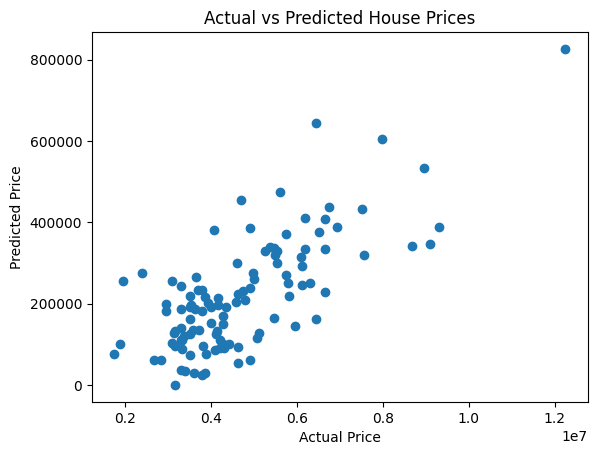

In [22]:
y_pred = model.predict(X_test)
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()

In [23]:
new_data = np.array([[5.0, 15, 10000, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,0.2,0.2,0,1,1,1,1]])
new_data_scaled = scaler.transform(new_data)
price = model.predict(new_data_scaled)
print('Predicted price:', price[0][0])

1/1 [==============================] - 0s 78ms/step
Predicted price: 453846980.0
